## Course Code: DS4003
## Course Name: Principles and Techniques for Data Science
## Lab Session: 08 - Timeseries Analysis


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os

# Today's Topic
## Time Series Analysis

We will use Air Passengers dataset as the main dataset for this lab. Additionally, we will use a stock price dataset of your choice and your task will be doing the same analysis with the stock price dataset as done with the Air Passengers dataset. 

We will use the basic Python library,the statsmodel libary for statistical computations (https://github.com/statsmodels/statsmodels/) and the tslearn library (https://tslearn.readthedocs.io/en/stable/). 

## We will use yfinance library to get our stock price dataset 

## Here is an example of loading Nvidia stock price data from 1st Jan 2016 to 31st Dec 2022

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

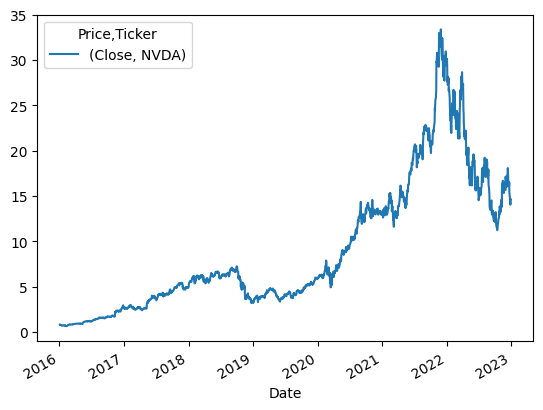

In [3]:
import yfinance as yf 
data = yf.download('NVDA','2016-01-01','2022-12-31')
data.reset_index(inplace=True)
nvda_stock = data[['Date', 'Close']]
nvda_stock.set_index('Date', inplace=True)
nvda_stock.sort_index(inplace=True)
nvda_stock.plot()

## Read the Air Passengers dataset as pandas dataframe 

In [4]:
df = pd.read_csv('AirPassengers.csv', header=0)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Convert month string to datetime object and set the index 

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

## Drop the Null / NaN values 

In [6]:
df.dropna(inplace=True)

## Plot the Data

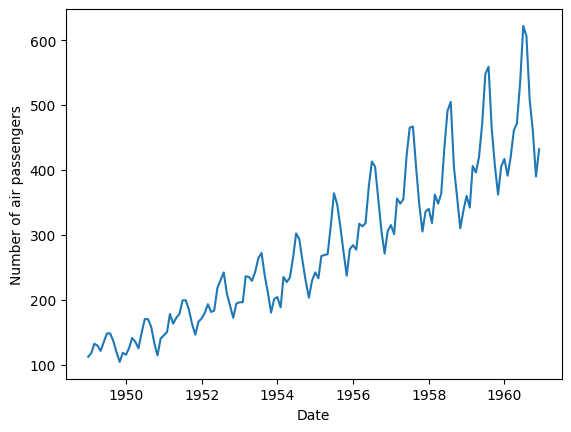

In [7]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)
plt.show()

# Task: Download a stock data of your choice 

Visit https://en.wikipedia.org/wiki/List_of_S%26P_500_companies 
Pick a ticker of your choice, download the stock price data for that company ticker. And visualize the adjusted closing price or closing price. 

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

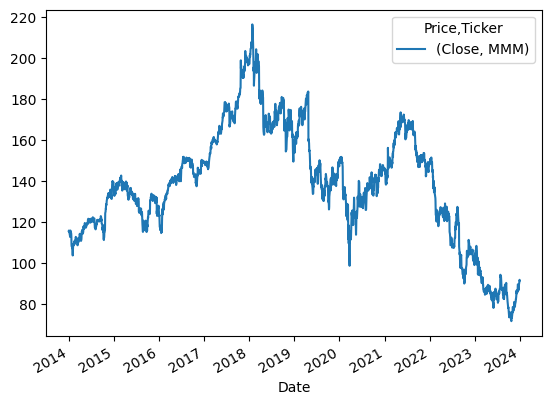

In [8]:
# Your code here 
data = yf.download('MMM','2014-01-01','2024-01-01')
data.reset_index(inplace=True)
mmm_stock = data[['Date', 'Close']]
mmm_stock.set_index('Date', inplace=True)
mmm_stock.sort_index(inplace=True)
mmm_stock.plot()

# Seasonal Decomposition 

Seasonal decomposition is based on the concept that a timeseries signal is made up of several components added or multiplied together. These underlying components are usually the trend, seasonality and residuals. Seasonal decomposition helps us to better understand the underlying patterns in a timeseries signal.

##### Additive: y(t) = Trend + Seasonality + Residuals
##### Multiplicative: y(t) = Trend * Seasonality * Residuals

The additive model is applied in seasonal decomposition when the seasonal variation remains relatively stable over time, whereas the multiplicative model is utilized when the seasonal variation escalates as time progresses.

We make use of the statsmodel package package to achieve this. You cna read more about the stats model package here: https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

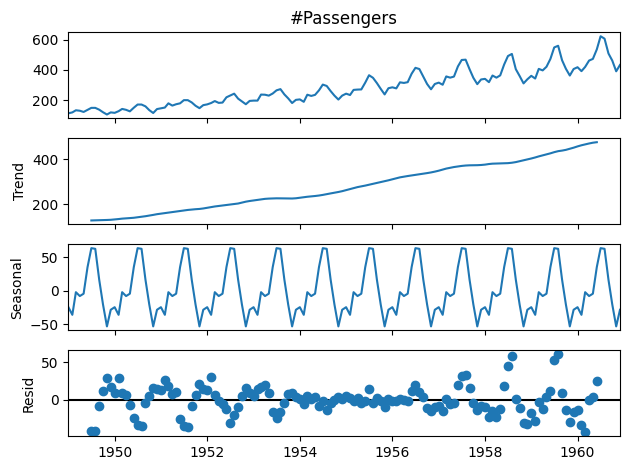

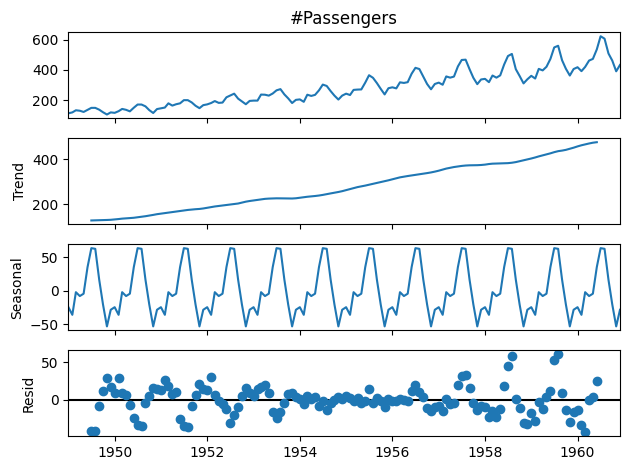

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(df['#Passengers'], model='additive')
result.plot()

# Task: Apply Seasonal Decomposition to your stock price dataset 

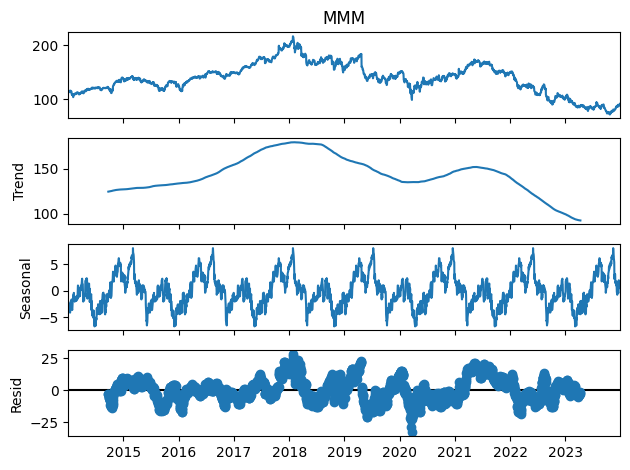

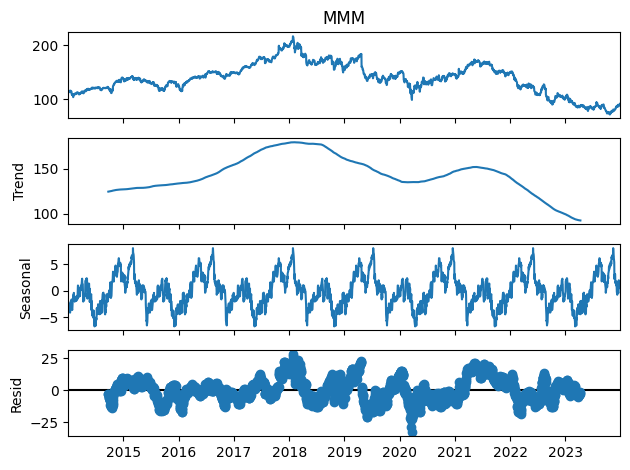

In [10]:
# Your code here 
mmm_stock_add_decom = seasonal_decompose(mmm_stock['Close']['MMM'], model='additive', period=365)
mmm_stock_add_decom.plot()

# ADF Test 
The ADF test is commonly used to check for stationarity in a timeseries. A stationary time series is one in which its statistical characteristics, including mean, variance, covariance, and standard deviation, remain constant over time. In a stationary timeseries only level(with constant variance) and noise are allowed.
We usually employ the statsmodel package for this task. You can read more about it here:https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

### Let's try to apply the ADF test to the air passengers data and observe the p-value

In [11]:
from statsmodels.tsa.stattools import adfuller 
res = adfuller(df.values)
print(f'p-value: {res[1]}')

p-value: 0.991880243437641


Null hypothesis: The time series is non-stationary. In this context, non-stationary means that the statistical properties of the series, such as its mean and variance, change over time.

Interpretation: Since the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the time series is likely non-stationary.




# Task: Apply ADF Test to your stock price data, is it stationary or not?

In [12]:
mmm_stock

Price,Close
Ticker,MMM
Date,
2014-01-02 00:00:00+00:00,115.493309
2014-01-03 00:00:00+00:00,115.760872
2014-01-06 00:00:00+00:00,115.075249
2014-01-07 00:00:00+00:00,115.091972
2014-01-08 00:00:00+00:00,114.239128
...,...
2023-12-22 00:00:00+00:00,88.904678
2023-12-26 00:00:00+00:00,90.392975


In [13]:
# Your code here 
mmm_stationary_pvalue = adfuller(mmm_stock.values)
print(f'p-value for MMM is {mmm_stationary_pvalue[1]}')     # not stationary

p-value for MMM is 0.5672932434786555


# Fixing Non-Constant Variance 
There are different ways to fix non-constant variance, we will use boxcox from scipy library. 


In [14]:
from scipy.stats import boxcox

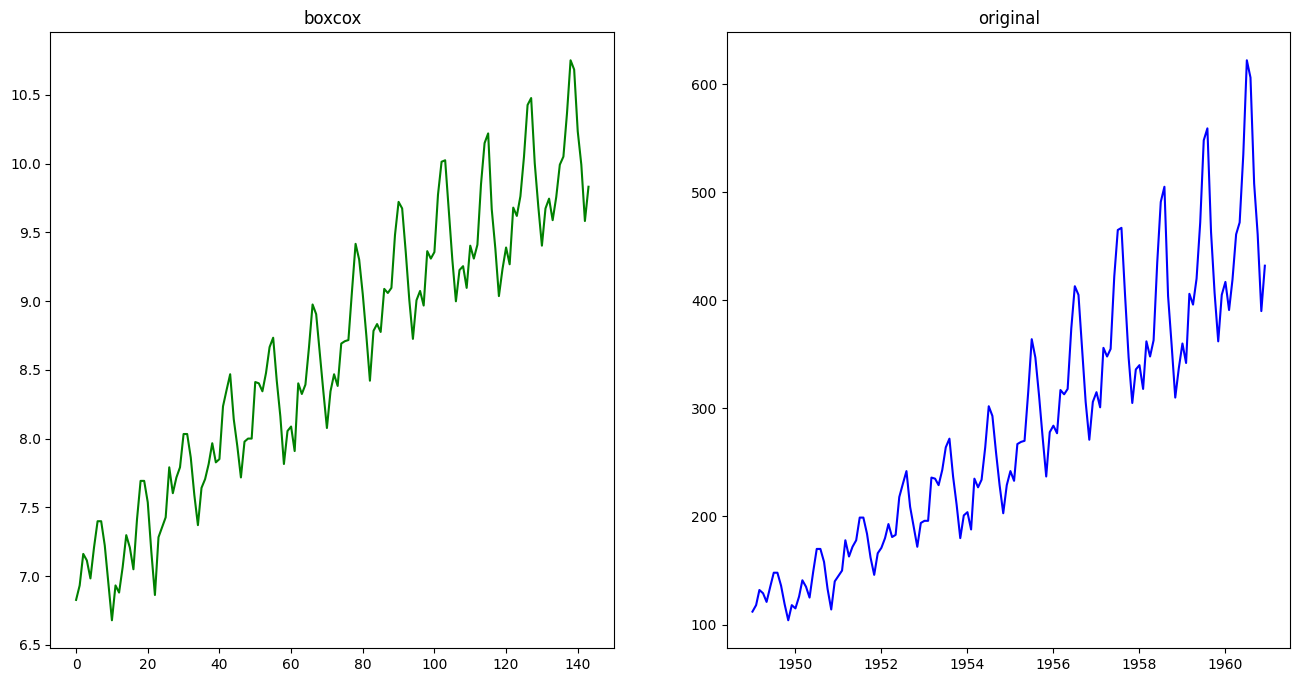

In [15]:
bc, lamda = boxcox(df['#Passengers'])
fig = plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.title('boxcox')
plt.plot(bc, color='green')
plt.subplot(1,2,2)
plt.title('original')
plt.plot(df, color='blue')
plt.show()

# Task: Apply boxcox to your stock data 

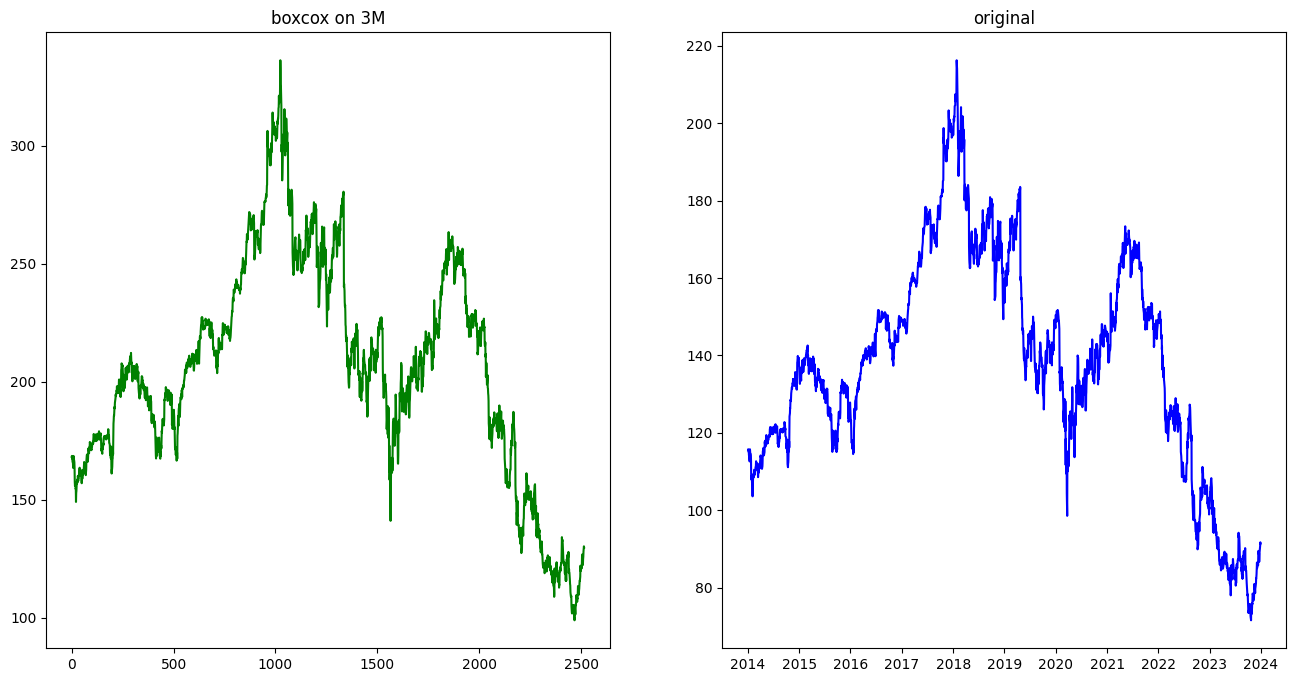

In [16]:
## plot after boxcox transformation on mmm

bc, lamda = boxcox(mmm_stock['Close']['MMM'])
fig = plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.title('boxcox on 3M')
plt.plot(bc, color='green')
plt.subplot(1,2,2)
plt.title('original')
plt.plot(mmm_stock, color='blue')
plt.show()

# Trend Removal 

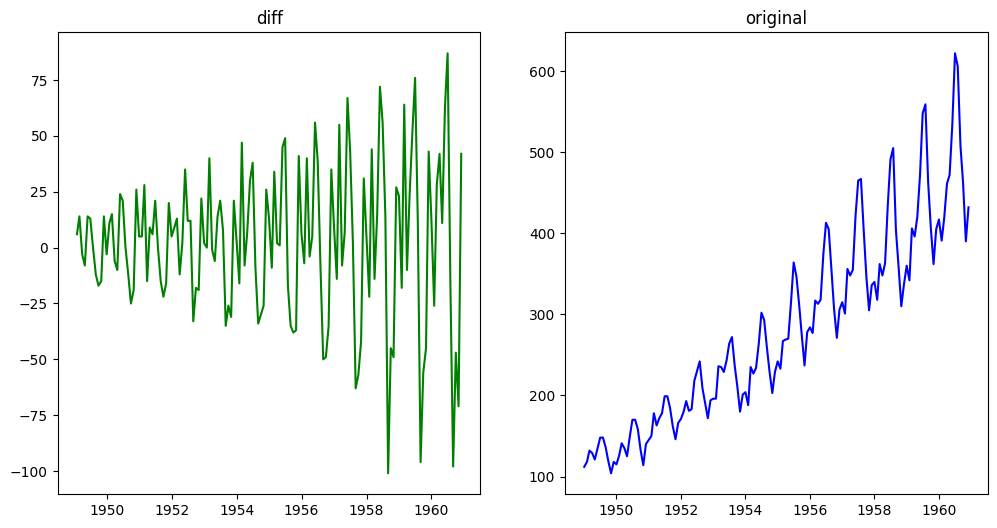

In [17]:
diff = df.diff() 
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('diff')
plt.plot(diff, color='green')
plt.subplot(1,2,2)
plt.title('original')
plt.plot(df, color='blue')
plt.show()

# Task: Apply Trend Removal on your stock data 

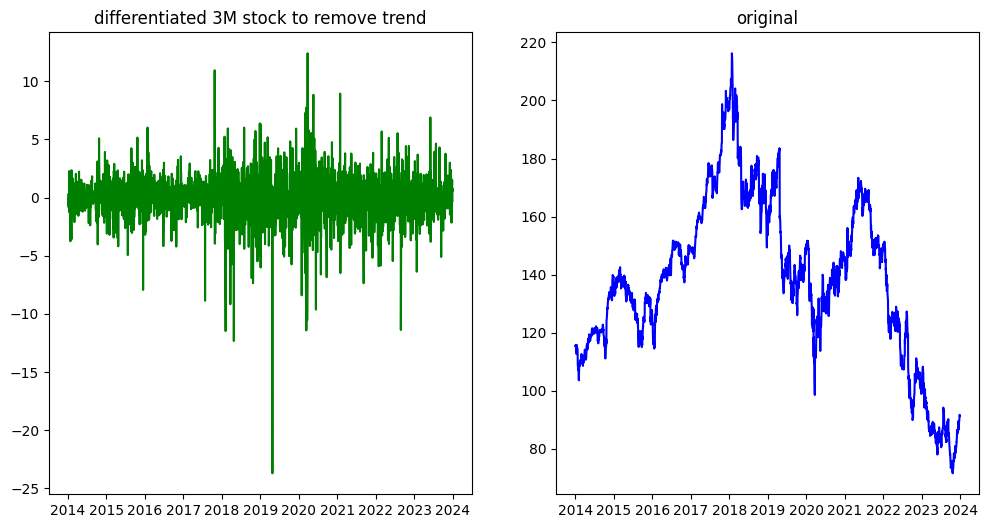

In [18]:
# your code here 
diff = mmm_stock['Close']['MMM'].diff()     ## Differentiating

fig = plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.title('differentiated 3M stock to remove trend')
plt.plot(diff, color='green')

plt.subplot(1,2,2)
plt.title('original')
plt.plot(mmm_stock, color='blue')
plt.show()

# Combine boxcox and trend removal and show them in plot 

In [19]:
bc, lamda = boxcox(df['#Passengers'])

bc_df = pd.DataFrame()
bc_df['boxcox'] = bc 
bc_df['Month'] = df.index
bc_df.set_index('Month', inplace=True)

bc_diff = bc_df.diff()

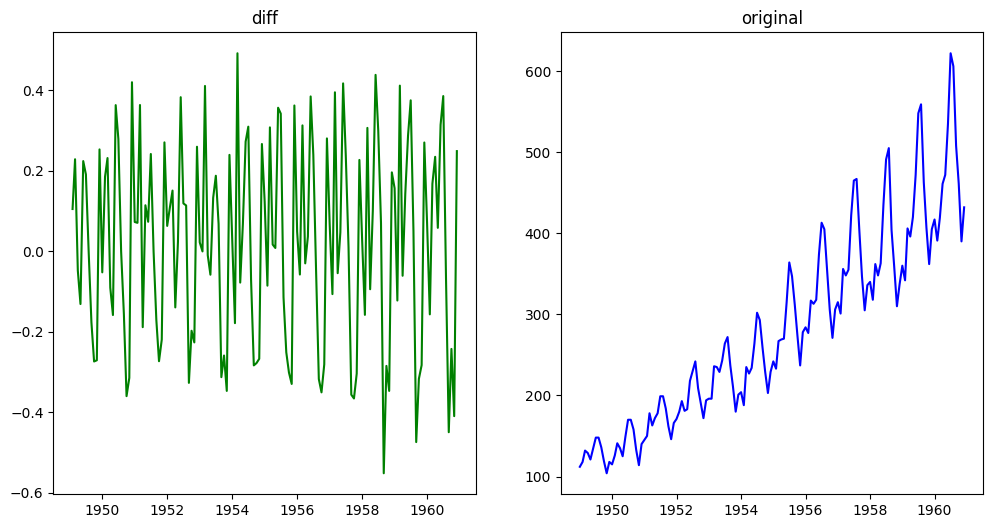

In [20]:
fig = plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.title('diff')
plt.plot(bc_diff, color='green')

plt.subplot(1,2,2)
plt.title('original')
plt.plot(df, color='blue')

plt.show()

# Exponential Smoothing 

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
edf = df.copy() 
edf = edf.asfreq('MS')  ## Turn timeseries into specified frequency

Note that the freq can be taken from Pandas datetime offset. You can find some description of other frequencies here: https://tedboy.github.io/pandas/timeseries/timeseries8.html

In [22]:
ts = edf.iloc[:, 0]
es = ExponentialSmoothing(ts).fit(smoothing_level=0.2)
pred = es.predict(start=ts.index[0], end=ts.index[-1])

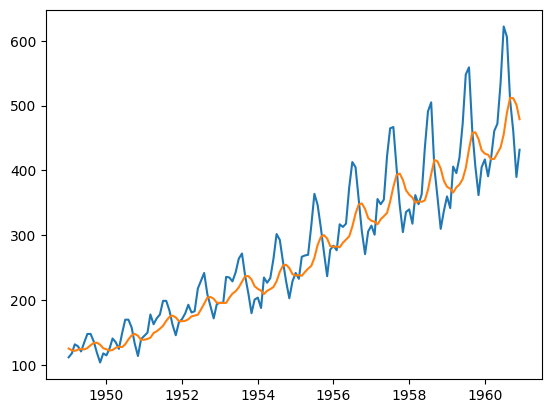

In [23]:
plt.plot(ts)
plt.plot(pred)

## Task: Lets try double exponential smoothing

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


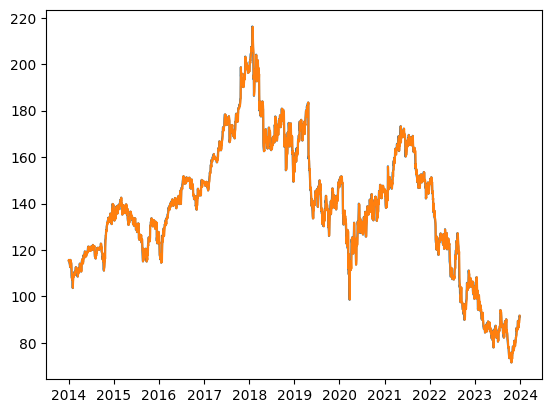

In [24]:
mmm_freq = mmm_stock['Close'].copy().asfreq(freq='D').dropna()

es_mmm = ExponentialSmoothing(mmm_freq, trend='add').fit()
pred_mmm = es_mmm.predict(start=0, end=len(mmm_freq)-1)

plt.plot(mmm_stock['Close']['MMM'])
plt.plot(pred_mmm)

## Task: Lets try triple exponential smoothing

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


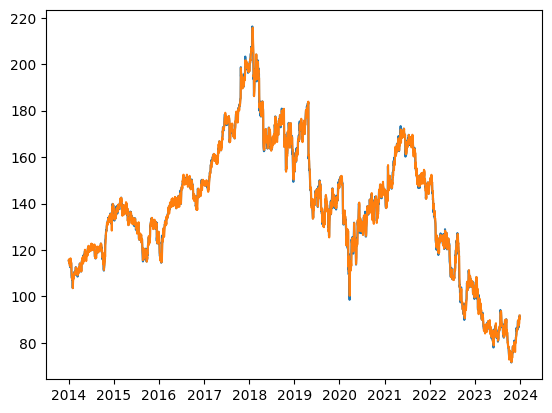

In [25]:
## Your code here
tes_mmm = ExponentialSmoothing(mmm_freq, trend='add', seasonal='add', seasonal_periods=365).fit()
pred_mmm = tes_mmm.predict(start=0, end=len(mmm_freq)-1)

plt.plot(mmm_stock['Close']['MMM'])
plt.plot(pred_mmm)

# Task: Apply Exponential Smooting on Stock data 
* Take a subset of data
* Check for NaN values 

In [26]:
# your code here
## Accidentally already did this in the prevous steps insetad of looking at the airpassengers dataset

# Time Series Prediction 

# AutoRegressive Model 

In [27]:
from statsmodels.tsa.ar_model import AutoReg 
train, test = df.iloc[:100], df.iloc[100:]
model = AutoReg(train, lags=24).fit()
pred = model.predict(start=0, end=df.shape[0], dynamic=False) 

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


118


C:\Users\victo\AppData\Local\Temp\ipykernel_20408\2556565974.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(train[1])


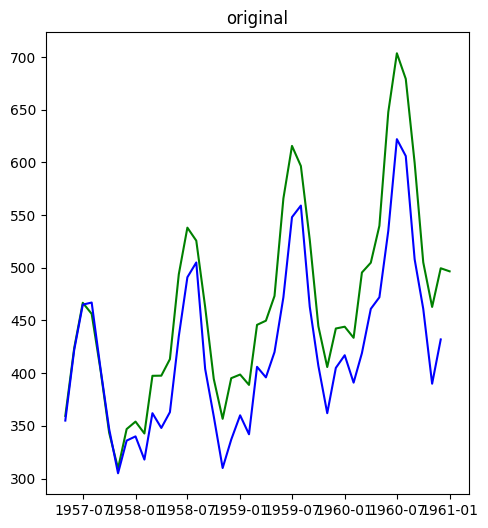

In [29]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('pred')
plt.plot(pred[100:], color='green')
plt.title('original')
plt.plot(df.iloc[100:]['#Passengers'], color='blue')
plt.show()

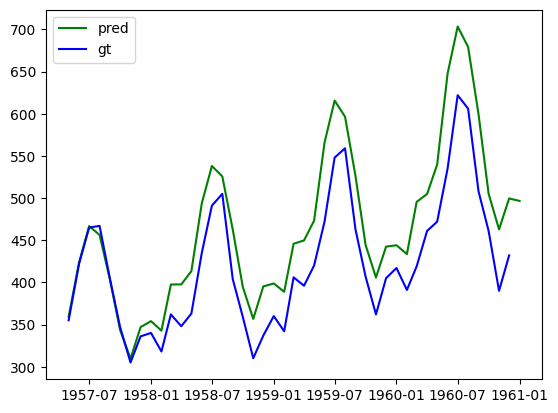

In [30]:
plt.figure()
plt.plot(pred[100:], color='green', label='pred')
plt.plot(df.iloc[100:]['#Passengers'], color='blue', label='gt')
plt.legend()
plt.show()

# ARMA & ARIMA 

In [31]:
from statsmodels.tsa.arima_model import ARMA 
help(ARMA)

Help on class ARMA in module statsmodels.tsa.arima_model:

class ARMA(builtins.object)
 |  ARMA(*args, **kwargs)
 |
 |  ARMA has been deprecated in favor of the new implementation
 |
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |
 |  Methods defined here:
 |
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



We will use ARIMA as ARMA is deprecated. The order of ARIMA is (p, d, q) where p is the AR component, d is order of differencing (trend removal) and q is the order of the moving average.

In [32]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-12-01,306
1957-01-01,315
1957-02-01,301


In [33]:
from statsmodels.tsa.arima.model import ARIMA 
model = ARIMA(train, order=(0, 0, 5)).fit()
pred = model.predict(start=0, end=df.shape[0], dynamic=False) 

print(model.summary())

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\Local

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  100
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -456.768
Date:                Mon, 02 Dec 2024   AIC                            927.537
Time:                        23:09:04   BIC                            945.773
Sample:                    01-01-1949   HQIC                           934.917
                         - 04-01-1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        218.3477     21.099     10.349      0.000     176.995     259.700
ma.L1          1.6712     11.354      0.147      0.883     -20.581      23.924
ma.L2          1.7405      7.630      0.228      0.8

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


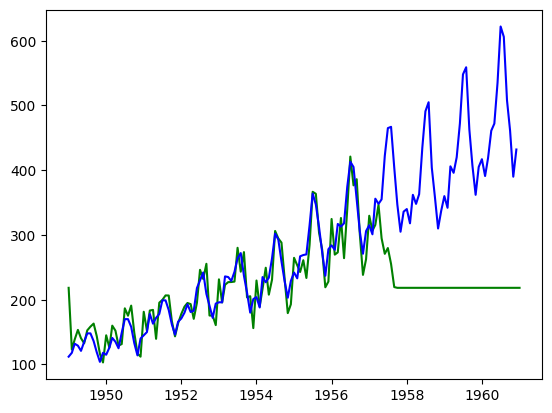

In [34]:
plt.figure()
plt.plot(pred, color='green', label='pred')
plt.plot(df['#Passengers'], color='blue', label='gt')
plt.show()

## Task: As we can see above, the prediction can be improved. Lets's try again with differnt values for p,q,d

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\Local

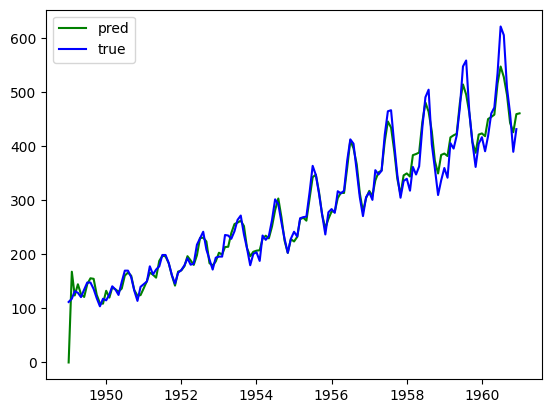

In [35]:
## your code here
model = ARIMA(train, order=(10, 2, 10)).fit()
pred = model.predict(start=0, end=df.shape[0], dynamic=False) 
plt.figure()
plt.plot(pred, color='green', label='pred')
plt.plot(df['#Passengers'], color='blue', label='true')
plt.legend()
plt.show()

# ARMA or ARIMA cannot deal with seasonal component 
# So, We move to Seasonal ARIMA or SARIMA 
## SARIMA is defined on the state space in statsmodels, so we will use pmdarima library 

In [36]:
from pmdarima import auto_arima 

In [76]:
model = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warning=True, stepwise=True)
model.fit(train)
pred = model.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=646.043, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.15 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.08 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.11 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [61]:
print(len(test))

44


In [77]:
print(pred)

1957-05-01    353.433649
1957-06-01    406.781321
1957-07-01    447.984392
1957-08-01    438.051605
1957-09-01    391.246543
1957-10-01    344.585092
1957-11-01    309.159969
1957-12-01    345.436075
1958-01-01    353.798005
1958-02-01    341.286867
1958-03-01    393.096441
1958-04-01    385.947221
1958-05-01    391.288635
1958-06-01    445.200445
1958-07-01    485.934933
1958-08-01    476.413240
1958-09-01    428.928631
1958-10-01    381.769781
1958-11-01    346.435080
1958-12-01    382.439764
1959-01-01    390.937409
1959-02-01    378.109597
1959-03-01    430.597759
1959-04-01    423.267583
1959-05-01    428.628615
1959-06-01    482.420435
1959-07-01    523.254588
1959-08-01    513.645458
1959-09-01    466.305385
1959-10-01    419.252330
1959-11-01    383.898396
1959-12-01    419.960810
1960-01-01    428.429589
1960-02-01    415.669133
1960-03-01    468.012962
1960-04-01    460.721274
1960-05-01    466.078133
1960-06-01    519.895475
1960-07-01    560.708430
1960-08-01    551.117897


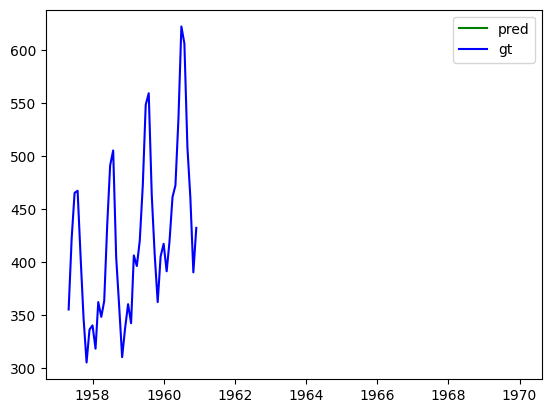

In [73]:
plt.figure()
plt.plot(pred, color='green', label='pred')
plt.plot(test, color='blue', label='gt')
plt.legend()
plt.show()

# Let's check the state space version of SARIMA
https://www.statsmodels.org/devel/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [39]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
train, test = df['#Passengers'].iloc[:100], df['#Passengers'].iloc[100:]

model = SARIMAX(train,order = (2,1,2),seasonal_order = (0,1,1,12)).fit(disp=False)

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
train, test = df['#Passengers'].iloc[:100], df['#Passengers'].iloc[100:]

print(len(test))
archive = [d for d in train]
predictions = list()
for i in range(len(test)): 
    model = SARIMAX(archive,order = (2,1,2),seasonal_order = (0,1,1,12)).fit(disp=False) 
    pred = model.forecast()[0]
    predictions.append(pred)
    archive.append(test.iloc[i])

print(len(predictions))

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


44


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


44


In [63]:
train

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1956-12-01    306
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
Name: #Passengers, Length: 100, dtype: int64

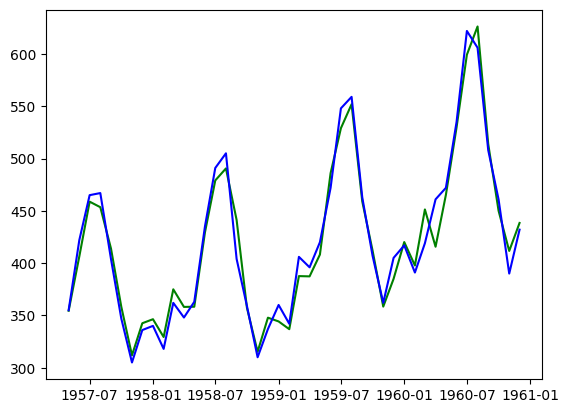

In [42]:
pred = pd.Series(predictions, index=test.index)
plt.figure()
plt.plot(pred, color='green', label='pred')
plt.plot(test, color='blue', label='gt')
plt.show()

# ACF / PACF plots for hyperparameter configuration and model selection

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## ACF
The ACF plot describes the autocorrelation between an observation and another observation at a prior timestep that includs direct and indirect dependence information. 

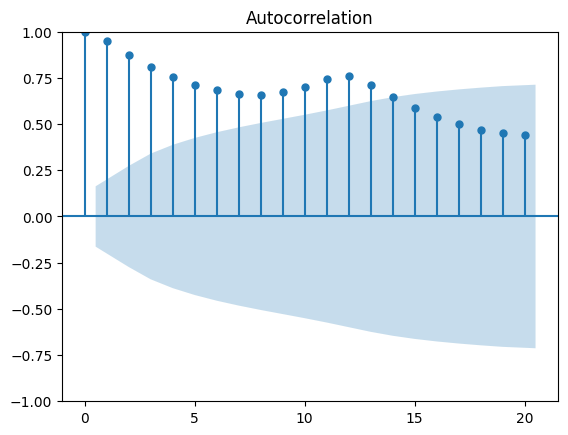

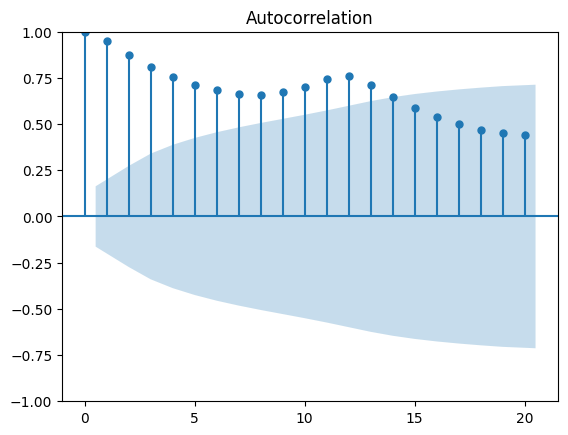

In [44]:
plot_acf(df["#Passengers"], lags=20)

## PACF
The PACF plot measures the correlation between an observation and its lagged values. 

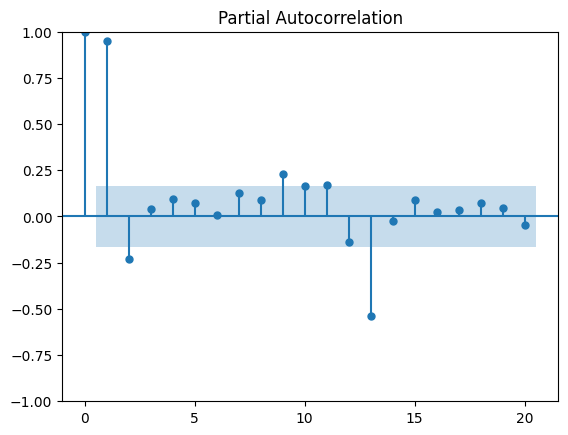

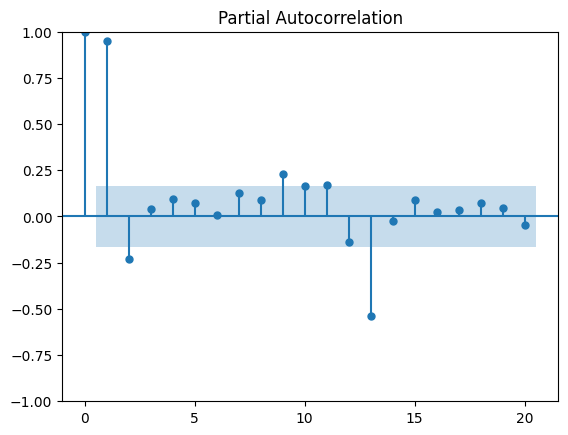

In [45]:
plot_pacf(df["#Passengers"], lags=20)

# Can you interpret the plots above?  